In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('stock_data.csv')
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [3]:
#Remove punctuation
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";",  ":", ",", "!",'"'))
    return final

df['Text'] = df['Text'].apply(remove_punctuation)
df['Text'].tail()

5786    Industry body CII said #discoms are likely to ...
5787    #Gold prices slip below Rs 46000 as #investors...
5788    Workers at Bajaj Auto have agreed to a 10% wag...
5789    #Sharemarket LIVE Sensex off day’s high up 600...
5790    #Sensex #Nifty climb off day's highs still up ...
Name: Text, dtype: object

In [4]:
#Lower Case
df['Text']=df['Text'].str.lower()
df['Text'].tail()

5786    industry body cii said #discoms are likely to ...
5787    #gold prices slip below rs 46000 as #investors...
5788    workers at bajaj auto have agreed to a 10% wag...
5789    #sharemarket live sensex off day’s high up 600...
5790    #sensex #nifty climb off day's highs still up ...
Name: Text, dtype: object

In [5]:
#Remove stopwords
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords.words("english")])
df['Text'] = df['Text'].apply(lambda text: cleaning_stopwords(text))
df['Text'].tail()

0    kickers watchlist xide tit soq pnk cpw bpz aj ...
1    user aap movie 55% return fea/geed indicator 1...
2    user i'd afraid short amzn - looking like near...
3                                            mnta 1200
4                                              oi 2137
Name: Text, dtype: object

In [6]:
#Remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Text'] = df['Text'].apply(lambda x: cleaning_numbers(x))
df['Text'].tail()

5786    industry body cii said #discoms likely suffer ...
5787    #gold prices slip rs  #investors book profits ...
5788    workers bajaj auto agreed % wage cut period ap...
5789    #sharemarket live sensex day’s high  points #n...
5790    #sensex #nifty climb day's highs still % key f...
Name: Text, dtype: object

In [7]:
#Remove URLs if any
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Text'] = df['Text'].apply(lambda x: cleaning_URLs(x))
df['Text'].tail()

5786    industry body cii said #discoms likely suffer ...
5787    #gold prices slip rs  #investors book profits ...
5788    workers bajaj auto agreed % wage cut period ap...
5789    #sharemarket live sensex day’s high  points #n...
5790    #sensex #nifty climb day's highs still % key f...
Name: Text, dtype: object

In [8]:
#Remove repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['Text'] = df['Text'].apply(lambda x: cleaning_repeating_char(x))
df['Text'].tail()

5786    industry body cii said #discoms likely suffer ...
5787    #gold prices slip rs  #investors book profits ...
5788    workers bajaj auto agreed % wage cut period ap...
5789    #sharemarket live sensex day’s high  points #n...
5790    #sensex #nifty climb day's highs still % key f...
Name: Text, dtype: object

In [9]:
train1, test1 = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

In [10]:
# Term Frequency Inverse Document Frequency Vectorizer 
# Transforms text into a meaningful representation of numbers which is used to fit machine algorithm for prediction

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
train_matrix = vectorizer.fit_transform(train1['Text'])
test_matrix = vectorizer.transform(test1['Text'])

In [19]:
#Function to evaluate the model
def model_Evaluate(model, xtest, ytest):
    # Predict values for Test dataset
    y_pred = model.predict(xtest)
    # Print the evaluation metrics for the dataset.
    print(classification_report(ytest, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(ytest, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    # ROC-AUC CURVE
    fpr, tpr, thresholds = roc_curve(ytest, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

x_train1 = train_matrix
x_test1 = test_matrix
y_train1 = train1['Sentiment']
y_test1 = test1['Sentiment']

lr.fit(x_train1,y_train1)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

          -1       0.80      0.23      0.36       824
           1       0.58      0.95      0.72       914

    accuracy                           0.61      1738
   macro avg       0.69      0.59      0.54      1738
weighted avg       0.68      0.61      0.55      1738



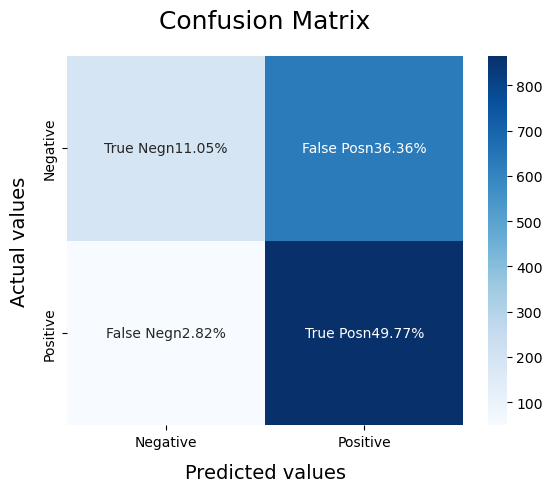

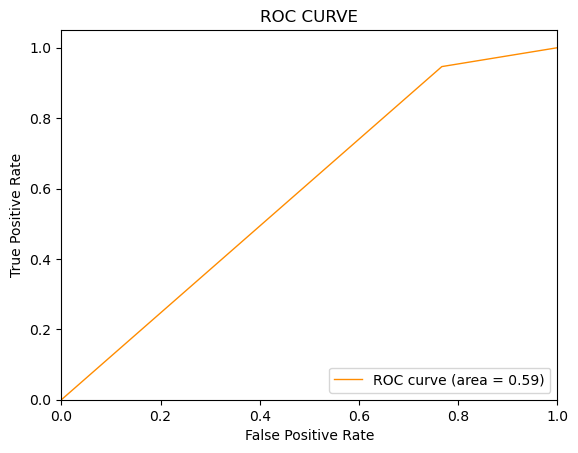

In [20]:
model_Evaluate(lr, x_test1, y_test1)

In [14]:
train2, test2 = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

In [15]:
x_train2 = train_matrix
x_test2 = test_matrix

y_train2 = train2['Sentiment']
y_test2 = test2['Sentiment']

import sklearn as sklearn

#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train2)

x_train2 = scaler.transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [16]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=150, random_state=0)
text_classifier.fit(x_train2, y_train2)

RandomForestClassifier(n_estimators=150, random_state=0)

              precision    recall  f1-score   support

          -1       0.73      0.33      0.46       824
           1       0.60      0.89      0.71       914

    accuracy                           0.63      1738
   macro avg       0.66      0.61      0.59      1738
weighted avg       0.66      0.63      0.59      1738



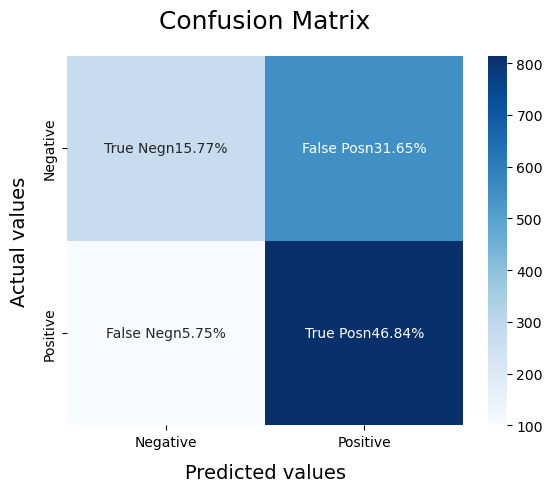

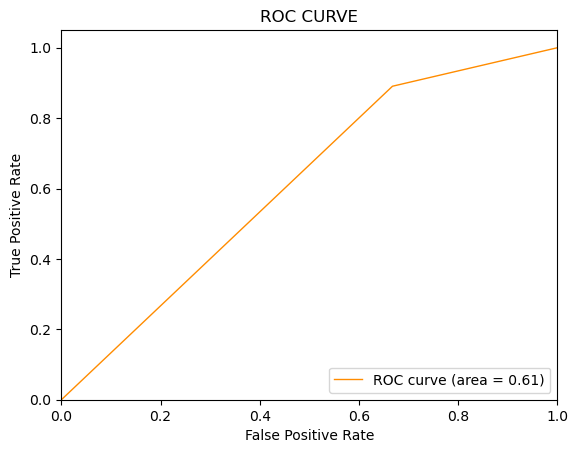

In [21]:
model_Evaluate(text_classifier, x_test2, y_test2)

In [ ]:
#From evaluation of the confusion matrix and ROC Curve, Random Forest Classification yields marginally better results
#Considered using LSTM and followed a tutorial to create the model. However didn't add any additional value to the model to submit as my own work.